# Gender Classification

**Dataset**: https://www.kaggle.com/datasets/ashishjangra27/gender-recognition-200k-images-celeba

## Import libs

In [8]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [9]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Auxiliar set up

In [10]:
pic_size = (200, 200)
base_path = '../datasets/gender'

## Data Augmentation and Loading

### Data Augmentation function

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

### Load data

In [12]:
train_generator = train_datagen.flow_from_directory(
    f"{base_path}/train",
    target_size=pic_size,
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    f"{base_path}/validation",
    target_size=pic_size,
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    f"{base_path}/test",
    target_size=pic_size,
    batch_size=32,
    class_mode='sparse'
)

Found 16000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Model Architecture

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(200, 200, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),
    Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),
    Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(1000, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.summary()

/home/pedro/ESESA/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │    80,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,097,146 (305.55 MB)

 Trainable params: 80,096,698 (305.54 MB)

 Non-trainable params: 448 (1.75 KB)

## Model Compilation and Training

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 905s 2s/step - accuracy: 0.7104 - loss: 11.5028 - val_accuracy: 0.6971 - val_loss: 2.1817 - learning_rate: 0.0010
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 896s 2s/step - accuracy: 0.8538 - loss: 0.3471 - val_accuracy: 0.9022 - val_loss: 0.2692 - learning_rate: 0.0010
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 960s 2s/step - accuracy: 0.8937 - loss: 0.2657 - val_accuracy: 0.9284 - val_loss: 0.1929 - learning_rate: 0.0010
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 986s 2s/step - accuracy: 0.9133 - loss: 0.2461 - val_accuracy: 0.9148 - val_loss: 0.2152 - learning_rate: 0.0010
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - accuracy: 0.9104 - loss: 0.2443 - val_accuracy: 0.9304 - val_loss: 0.1705 - learning_rate: 0.0010
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 902s 2s/step - accuracy: 0.9190 - loss: 0.2153 - val_accuracy: 0.9229 - val_loss: 0.2107 - learning_rate: 0.0010
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 903s 2s/step - accuracy: 0.9252 - loss: 0

## Training stats

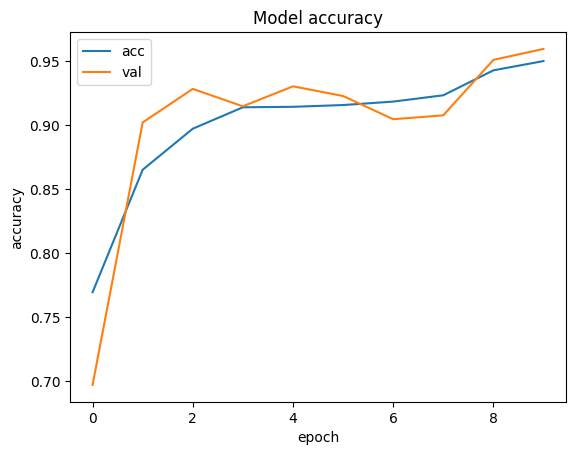

In [15]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val'], loc='upper left')
plt.show()

## Prediction function

In [16]:
def predict_image(model, image_path, target_size=pic_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    return prediction

## Image prediction

In [17]:
class_labels = ['female', 'male']

In [18]:
def display_and_predict(image_path, model, class_labels):
    """
    Display an image and perform prediction using a pre-trained model.
    
    Args:
        image_path (str): Path to the image file
        model: Trained model for prediction
        class_labels (list): List of class labels corresponding to model outputs
    
    Returns:
        tuple: (predicted_class, confidence) or (None, None) if error occurs
    
    Raises:
        FileNotFoundError: If image file doesn't exist
        ValueError: If model or class_labels are invalid
    """
    try:
        # Validate inputs
        if not model:
            raise ValueError("Model cannot be None")
        if not class_labels or not isinstance(class_labels, (list, np.ndarray)):
            raise ValueError("Invalid class labels")
            
        # Display image
        from IPython.display import Image, display
        display(Image(image_path))
        
        # Make prediction
        prediction = predict_image(model, image_path)
        predicted_class = class_labels[np.argmax(prediction)]
        confidence = np.max(prediction)
        
        # Print results
        print(f"Predicted class: {predicted_class}")
        print(f"Confidence: {confidence:.2f}")
        
        return predicted_class, confidence
        
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None, None
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return None, None

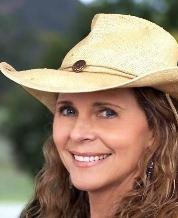

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: female
Confidence: 1.00


In [22]:
predicted_class_1, confidence_1 = display_and_predict('../pictures/4.jpg', model, class_labels)

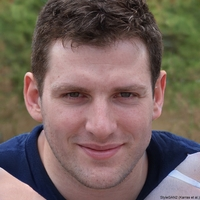

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: male
Confidence: 1.00


In [20]:
predicted_class_2, confidence_2 = display_and_predict('../pictures/5.jpeg', model, class_labels)

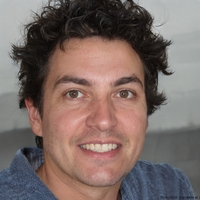

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: male
Confidence: 1.00


In [21]:
predicted_class_3, confidence_4 = display_and_predict('../pictures/6.jpeg', model, class_labels)